# Data Exploration

## Imports

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option("expand_frame_repr", False)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from df_outlier import DfOutlier
from vis_seaborn import *

2021-07-16 02:08:35,982 — DfOutlier — DEBUG — Loaded successfully!


## Data reading

In [4]:
df = pd.read_csv("../data/processed_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146882 entries, 0 to 146881
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       146882 non-null  int64  
 1   start                           146882 non-null  object 
 2   start_ms                        146882 non-null  float64
 3   end                             146882 non-null  object 
 4   end_ms                          146882 non-null  float64
 5   dur_(ms)                        146882 non-null  float64
 6   imsi                            146882 non-null  int64  
 7   msisdn_number                   146882 non-null  int64  
 8   imei                            146882 non-null  int64  
 9   last_location_name              146882 non-null  object 
 10  avg_rtt_dl_(ms)                 146882 non-null  float64
 11  avg_rtt_ul_(ms)                 146882 non-null  float64
 12  avg_bearer_tp_dl

## Handling Outlier

first we need to select numeric columns

In [5]:
Id = ["bearer_id", 'msisdn_number', 'imei', 'imsi']
categorical_columns = ["last_location_name", "handset_manufacturer", "handset_type"]
columns_with_time = ['start', 'end']

In [6]:
nun_numeric = Id
nun_numeric.extend(categorical_columns)
nun_numeric.extend(columns_with_time)
nun_numeric

['bearer_id',
 'msisdn_number',
 'imei',
 'imsi',
 'last_location_name',
 'handset_manufacturer',
 'handset_type',
 'start',
 'end']

In [7]:
numeric_columns = [col if col not in nun_numeric else ' ' for col in df]
numeric_columns = list(filter(lambda a: a != ' ', numeric_columns))
numeric_columns

['start_ms',
 'end_ms',
 'dur_(ms)',
 'avg_rtt_dl_(ms)',
 'avg_rtt_ul_(ms)',
 'avg_bearer_tp_dl_(kbps)',
 'avg_bearer_tp_ul_(kbps)',
 'tcp_dl_retrans_vol_(bytes)',
 'tcp_ul_retrans_vol_(bytes)',
 'dl_tp_<_50_kbps_(%)',
 '50_kbps_<_dl_tp_<_250_kbps_(%)',
 '250_kbps_<_dl_tp_<_1_mbps_(%)',
 'dl_tp_>_1_mbps_(%)',
 'ul_tp_<_10_kbps_(%)',
 '10_kbps_<_ul_tp_<_50_kbps_(%)',
 '50_kbps_<_ul_tp_<_300_kbps_(%)',
 'ul_tp_>_300_kbps_(%)',
 'activity_duration_dl_(ms)',
 'activity_duration_ul_(ms)',
 'nb_of_sec_with_vol_dl_<_6250b',
 'nb_of_sec_with_vol_ul_<_1250b',
 'social_media_dl_(bytes)',
 'social_media_ul_(bytes)',
 'google_dl_(bytes)',
 'google_ul_(bytes)',
 'email_dl_(bytes)',
 'email_ul_(bytes)',
 'youtube_dl_(bytes)',
 'youtube_ul_(bytes)',
 'netflix_dl_(bytes)',
 'netflix_ul_(bytes)',
 'gaming_dl_(bytes)',
 'gaming_ul_(bytes)',
 'other_dl_(bytes)',
 'other_ul_(bytes)',
 'total_ul_(bytes)',
 'total_dl_(bytes)']

In [8]:
numeric_df = df[numeric_columns].copy()

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5.

In [9]:
df_outliers = DfOutlier(numeric_df)
overview = df_outliers.getOverview()
overview.sort_values(by=["number_of_outliers"], inplace=True)
overview


,Q1,median,Q3,IQR,skew,number_of_outliers,percentage_of_outliers,min_value,max_value,mean
label,,,,,,,,,,
start_ms,250.00,499.00,749.00,499.00,0.00,0,0.0%,0.00,999.00,499.12
other_ul_(bytes),4144448.25,8265785.50,12381795.75,8237347.50,0.00,0,0.0%,148.00,16558816.00,8262764.38
other_dl_(bytes),210152455.50,421628557.00,631363358.25,421210902.75,0.00,0,0.0%,3290.00,843442489.00,420998412.33
gaming_ul_(bytes),4132750.50,8294496.00,12432138.25,8299387.75,-0.00,0,0.0%,59.00,16558794.00,8290219.06
gaming_dl_(bytes),210375899.00,423489323.00,633314866.25,422938967.25,-0.00,0,0.0%,2516.00,843441889.00,422058260.07
netflix_ul_(bytes),5480179.00,10999499.00,16503525.25,11023346.25,-0.00,0,0.0%,35.00,22011955.00,11002996.24
netflix_dl_(bytes),5776360.50,11642699.00,17470227.75,11693867.25,-0.00,0,0.0%,42.00,23259189.00,11626437.16
youtube_ul_(bytes),5516670.00,11013205.00,16514013.50,10997343.50,-0.00,0,0.0%,105.00,22011962.00,11008537.94
youtube_dl_(bytes),5833380.25,11615961.50,17440446.00,11607065.75,0.00,0,0.0%,53.00,23259098.00,11633088.45


Outliers can have many causes, such as, Measurement or input error, Data corruption or may be True outlier observation. I will replace autliers with

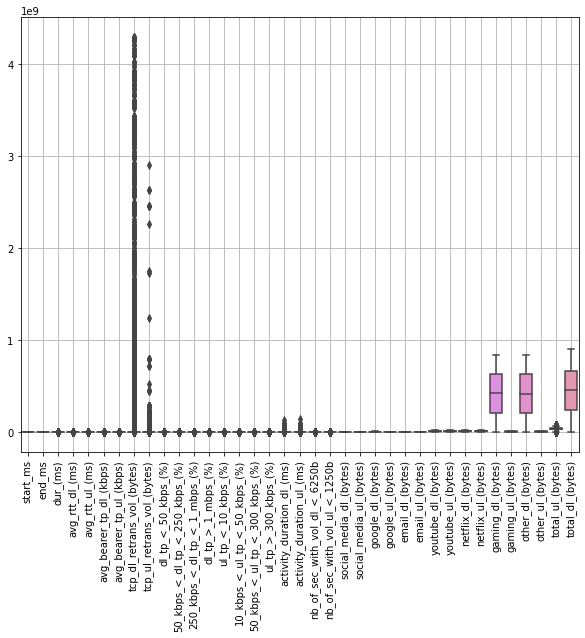

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
bp = sns.boxplot(data=df[numeric_columns])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.grid(True)

In [11]:
df_outliers = DfOutlier(df)
df_outliers.replace_outliers_with_iqr(numeric_columns)

In [12]:
clean_df = df_outliers.df

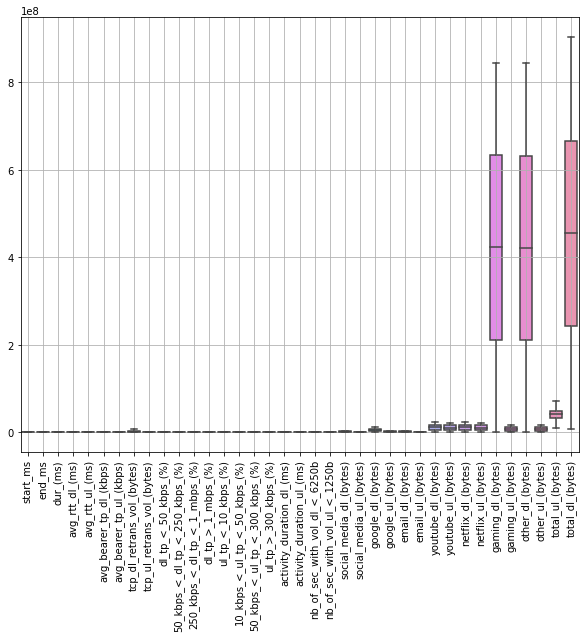

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
bp = sns.boxplot(data=clean_df[numeric_columns])
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.grid(True)

In [14]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146882 entries, 0 to 146881
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   bearer_id                       146882 non-null  int64  
 1   start                           146882 non-null  object 
 2   start_ms                        146882 non-null  float64
 3   end                             146882 non-null  object 
 4   end_ms                          146882 non-null  float64
 5   dur_(ms)                        146882 non-null  float64
 6   imsi                            146882 non-null  int64  
 7   msisdn_number                   146882 non-null  int64  
 8   imei                            146882 non-null  int64  
 9   last_location_name              146882 non-null  object 
 10  avg_rtt_dl_(ms)                 146882 non-null  float64
 11  avg_rtt_ul_(ms)                 146882 non-null  float64
 12  avg_bearer_tp_dl

In [ ]:
clean_df.to_csv('../data/clean_data.csv', index=False)